In [1]:
import pandas as pd
import joblib
from datetime import datetime

In [2]:
model = joblib.load("C:/HoGent/Jaar2/ML/Project/MachineLearningProject_Solar/script/best_model.joblib")


In [3]:
forecast_df = pd.read_csv(r"C:/HoGent/Jaar2/ML/Project/MachineLearningProject_Solar/data/forecast.csv")
sunset_df = pd.read_csv(r"C:/HoGent/Jaar2/ML/Project/MachineLearningProject_Solar/data/sunrise-sunset.csv")


In [4]:
forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          48 non-null     object 
 1   temp               48 non-null     float64
 2   pressure           48 non-null     int64  
 3   cloudiness         48 non-null     float64
 4   humidity_relative  48 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 2.0+ KB


In [5]:
sunset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   datum           731 non-null    object
 1   Opkomst         731 non-null    object
 2   Op ware middag  731 non-null    object
 3   Ondergang       731 non-null    object
dtypes: object(4)
memory usage: 23.0+ KB


In [6]:
# day of the year
forecast_df['timestamp'] = pd.to_datetime(forecast_df['timestamp'])
forecast_df['day_of_year'] = forecast_df['timestamp'].dt.dayofyear

# sunrise and sunset
sunset_df['datum'] = pd.to_datetime(sunset_df['datum'])
sunset_df['day_of_year'] = sunset_df['datum'].dt.dayofyear


In [7]:
forecast_df.head()

,timestamp,temp,pressure,cloudiness,humidity_relative,day_of_year
0,2024-05-18 22:00:00,13.91,1004,0.40,88,139
1,2024-05-18 23:00:00,13.43,1006,0.40,90,139
2,2024-05-19 00:00:00,12.86,1007,0.48,92,140
3,2024-05-19 01:00:00,12.30,1009,0.56,94,140
4,2024-05-19 02:00:00,11.74,1010,0.72,96,140


In [8]:
sunset_df.head()

,datum,Opkomst,Op ware middag,Ondergang,day_of_year
0,2023-01-01,08:45:00,12:46:00,16:47:00,1
1,2023-01-02,08:45:00,12:46:00,16:48:00,2
2,2023-01-03,08:45:00,12:47:00,16:49:00,3
3,2023-01-04,08:44:00,12:47:00,16:51:00,4
4,2023-01-05,08:44:00,12:48:00,16:52:00,5


In [9]:
# merge the two dataframes
merged_forecast_df = pd.merge(forecast_df, sunset_df, on='day_of_year', how='left')

In [10]:
merged_forecast_df.head()

,timestamp,temp,pressure,cloudiness,humidity_relative,day_of_year,datum,Opkomst,Op ware middag,Ondergang
0,2024-05-18 22:00:00,13.91,1004,0.40,88,139,2023-05-19,05:49:00,13:39:00,21:30:00
1,2024-05-18 22:00:00,13.91,1004,0.40,88,139,2024-05-18,05:49:00,13:39:00,21:30:00
2,2024-05-18 23:00:00,13.43,1006,0.40,90,139,2023-05-19,05:49:00,13:39:00,21:30:00
3,2024-05-18 23:00:00,13.43,1006,0.40,90,139,2024-05-18,05:49:00,13:39:00,21:30:00
4,2024-05-19 00:00:00,12.86,1007,0.48,92,140,2023-05-20,05:47:00,13:39:00,21:32:00


In [11]:
merged_forecast_df.drop_duplicates(subset=['timestamp'], inplace=True)

In [12]:
merged_forecast_df['hour'] = merged_forecast_df['timestamp'].dt.hour

In [13]:
""" 
merged_forecast_df["Opkomst"] = pd.to_datetime(merged_forecast_df["Opkomst"], utc=True)
merged_forecast_df["Op ware middag"] = pd.to_datetime(merged_forecast_df["Op ware middag"], utc=True)
merged_forecast_df["Ondergang"] = pd.to_datetime(merged_forecast_df["Ondergang"], utc=True) """

' \nmerged_forecast_df["Opkomst"] = pd.to_datetime(merged_forecast_df["Opkomst"], utc=True)\nmerged_forecast_df["Op ware middag"] = pd.to_datetime(merged_forecast_df["Op ware middag"], utc=True)\nmerged_forecast_df["Ondergang"] = pd.to_datetime(merged_forecast_df["Ondergang"], utc=True) '

In [14]:
merged_forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 94
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          48 non-null     datetime64[ns]
 1   temp               48 non-null     float64       
 2   pressure           48 non-null     int64         
 3   cloudiness         48 non-null     float64       
 4   humidity_relative  48 non-null     int64         
 5   day_of_year        48 non-null     int64         
 6   datum              48 non-null     datetime64[ns]
 7   Opkomst            48 non-null     object        
 8   Op ware middag     48 non-null     object        
 9   Ondergang          48 non-null     object        
 10  hour               48 non-null     int64         
dtypes: datetime64[ns](2), float64(2), int64(4), object(3)
memory usage: 4.5+ KB


In [15]:
# convert to floats (Ondergang, Opkomst, Op ware middag)
merged_forecast_df['Ondergang'] = merged_forecast_df['Ondergang'].astype(str).str.replace(':', '').astype(float)
merged_forecast_df['Opkomst'] = merged_forecast_df['Opkomst'].astype(str).str.replace(':','').astype(float)
merged_forecast_df['Op ware middag'] = merged_forecast_df['Op ware middag'].astype(str).str.replace(':','').astype(float)

In [16]:
merged_forecast_df.head()

,timestamp,temp,pressure,cloudiness,humidity_relative,day_of_year,datum,Opkomst,Op ware middag,Ondergang,hour
0,2024-05-18 22:00:00,13.91,1004,0.40,88,139,2023-05-19,54900.0,133900.0,213000.0,22
2,2024-05-18 23:00:00,13.43,1006,0.40,90,139,2023-05-19,54900.0,133900.0,213000.0,23
4,2024-05-19 00:00:00,12.86,1007,0.48,92,140,2023-05-20,54700.0,133900.0,213200.0,0
6,2024-05-19 01:00:00,12.30,1009,0.56,94,140,2023-05-20,54700.0,133900.0,213200.0,1
8,2024-05-19 02:00:00,11.74,1010,0.72,96,140,2023-05-20,54700.0,133900.0,213200.0,2


In [17]:
# drop columns
merged_forecast_df = merged_forecast_df.drop(columns=['timestamp', 'datum'])

In [18]:
merged_forecast_df = merged_forecast_df[['temp', 'humidity_relative', 'pressure', 'cloudiness', 'Opkomst', 'Op ware middag', 'Ondergang', 'hour', 'day_of_year']]

In [23]:
# run model on forecast data
predictions = model.predict(merged_forecast_df)
# save predictions
output_df = pd.DataFrame({'prediction': predictions})

# print forecast for variable hour : prediction
print(output_df)



    prediction
0     0.002846
1     0.002159
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.004893
9     0.027428
10    0.063890
11    0.005616
12    0.717826
13    0.969335
14    1.170293
15    1.194508
16    1.187460
17    0.926562
18    0.802842
19    0.693158
20    0.348809
21    0.109675
22    0.016875
23    0.001623
24    0.000069
25    0.000122
26    0.000000
27    0.000000
28    0.000000
29    0.000000
30    0.000000
31    0.000000
32    0.004720
33    0.027961
34    0.064362
35    0.010939
36    0.625056
37    0.623408
38    0.826889
39    0.847055
40    0.834178
41    0.871269
42    0.790922
43    0.664333
44    0.324384
45    0.095514
46    0.016272
47    0.007430


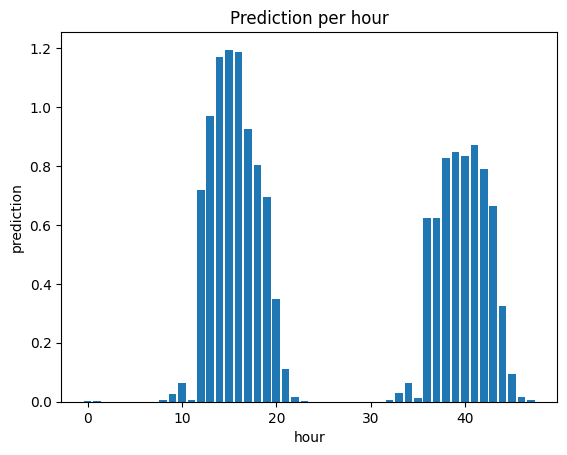

In [28]:
# bar chart
import matplotlib.pyplot as plt
import numpy as np
hours = merged_forecast_df["hour"]


hours = np.arange(0, 48, 1)
plt.bar(hours, predictions)
plt.xlabel('hour')
plt.ylabel('prediction')
plt.title('Prediction per hour')
plt.show()
